# Summary:

This notebook is for visualizing contig annotations from PROKKA

    
# Example Use Case:

In this example, the complete Shakya et al. 2013 metagenome is being compared to small, medium, and large subsamples of itself after conservative or aggressive read filtering and assembly with SPAdes or MEGAHIT. The datasets used in this example are named according to their metagenome content, relative degree of read filtering, and assembler used:

* SRR606249 = Accession number for the complete Shakya et al. 2013 metagenome
* subset50 = 50% of the complete Shakya et al. 2013 metagenome
* subset25 = 25% of the complete Shakya et al. 2013 metagenome
* subset10 = 10% of the complete Shakya et al. 2013 metagenome
* pe.trim2 = Conservative read filtering
* pe.trim30 = Aggressive read filtering
* megahit = MEGHIT assembly 
* spades = SPAdes assembly 


# Objectives:

* Annotation 
* Total number of genes
* Total number unique
* Compare samples and spit out unique

In [1]:
#Import pyupset and dependencies 
#import pyupset as pyu (Not sure that we want to use pyupset)
import matplotlib as mpl
import matplotlib.pyplot as plt
from pickle import load
import pandas as pd
import glob
%matplotlib inline

In [2]:
def concat_files(filenames):
    x = glob.glob(filenames)
    list_of_dfs = [pd.read_table(filename) for filename in x]
    for dataframe, filename in zip(list_of_dfs, x):
        dataframe['filename'] = filename
    combined_df = pd.concat(list_of_dfs, ignore_index=True)
    return combined_df
concat_files("*tsv")


,locus_tag,ftype,gene,EC_number,product,filename
0,OBGPGDIN_00001,CDS,drrB_1,Daunorubicin/doxorubicin resistance ABC transp...,NaN,SRR606249_subset25_1.trim30_megahit_.tsv
1,OBGPGDIN_00002,CDS,hypothetical protein,NaN,NaN,SRR606249_subset25_1.trim30_megahit_.tsv
2,OBGPGDIN_00003,CDS,hypothetical protein,NaN,NaN,SRR606249_subset25_1.trim30_megahit_.tsv
3,OBGPGDIN_00004,CDS,hypothetical protein,NaN,NaN,SRR606249_subset25_1.trim30_megahit_.tsv
4,OBGPGDIN_00005,CDS,hypothetical protein,NaN,NaN,SRR606249_subset25_1.trim30_megahit_.tsv
5,OBGPGDIN_00006,CDS,valS_1,6.1.1.9,Valine--tRNA ligase,SRR606249_subset25_1.trim30_megahit_.tsv
6,OBGPGDIN_00007,CDS,hypothetical protein,NaN,NaN,SRR606249_subset25_1.trim30_megahit_.tsv
7,OBGPGDIN_00008,CDS,hypothetical protein,NaN,NaN,SRR606249_subset25_1.trim30_megahit_.tsv
8,OBGPGDIN_00009,CDS,hypothetical protein,NaN,NaN,SRR606249_subset25_1.trim30_megahit_.tsv
9,OBGPGDIN_00010,CDS,hypothetical protein,NaN,NaN,SRR606249_subset25_1.trim30_megahit_.tsv


In [3]:
# Calculate the total number of genes annotated with Prokka
def calc_total_genes():
    combined_df = concat_files("*tsv")
    x = combined_df.groupby('filename').gene.count()
    y = x.to_frame()
    bingo = y.sort_values('gene',ascending=False)
    bingo
    return bingo
calc_total_genes()

,gene
filename,
SRR606249_1.trim2_megahit_.tsv,195733
SRR606249_1.trim30_megahit_.tsv,195340
SRR606249_subset50_1.trim2_megahit_.tsv,193931
SRR606249_1.trim2_spades_.tsv,192008
SRR606249_subset50_1.trim30_megahit_.tsv,191005
SRR606249_1.trim30_spades_.tsv,190777
SRR606249_subset50_1.trim30_spades_.tsv,184330
SRR606249_subset25_1.trim2_megahit_.tsv,182300
SRR606249_subset25_1.trim2_spades_.tsv,177824


In [4]:
# Calculate the total number of unique genes annotated with Prokka

def calculate_unique_genes():
    combined_df = concat_files("*tsv")
    x = combined_df.groupby('filename').gene.nunique()
    y = x.to_frame()
    bingo = y.sort_values('gene',ascending=False)
    bingo
    return bingo
calculate_unique_genes()

,gene
filename,
SRR606249_1.trim2_megahit_.tsv,94112
SRR606249_1.trim2_spades_.tsv,93457
SRR606249_1.trim30_megahit_.tsv,91514
SRR606249_1.trim30_spades_.tsv,90661
SRR606249_subset50_1.trim2_megahit_.tsv,89970
SRR606249_subset50_1.trim30_megahit_.tsv,85913
SRR606249_subset50_1.trim30_spades_.tsv,85258
SRR606249_subset25_1.trim2_megahit_.tsv,77010
SRR606249_subset25_1.trim2_spades_.tsv,76953


In [5]:
# Calcuate the intersection between the unique genes in each dataset
combined_df = concat_files('*tsv')
combined_df.dropna(axis=0, inplace=True)
#combined_df.head()
g = combined_df.groupby('gene')
ug = list(set(combined_df['gene']))

In [6]:
g.get_group(ug[0])

,locus_tag,ftype,gene,EC_number,product,filename
1598,OBGPGDIN_01597,CDS,pepA_2,3.4.11.1,Cytosol aminopeptidase,SRR606249_subset25_1.trim30_megahit_.tsv
181509,GJENEIJK_08490,CDS,pepA_2,3.4.11.1,Cytosol aminopeptidase,SRR606249_subset25_1.trim2_spades_.tsv
360196,EDLHBDBE_08981,CDS,pepA_2,3.4.11.1,Cytosol aminopeptidase,SRR606249_subset25_1.trim30_spades_.tsv
542014,AFCEBHFN_23522,CDS,pepA_2,3.4.11.1,Cytosol aminopeptidase,SRR606249_subset25_1.trim2_megahit_.tsv
705369,EFEGHJOA_04190,CDS,pepA_2,3.4.11.1,Cytosol aminopeptidase,SRR606249_1.trim2_spades_.tsv
913705,DBPCJIAG_20188,CDS,pepA_2,3.4.11.1,Cytosol aminopeptidase,SRR606249_1.trim30_megahit_.tsv
1094010,EKJEKHNL_04773,CDS,pepA_2,3.4.11.1,Cytosol aminopeptidase,SRR606249_subset50_1.trim30_spades_.tsv
1276915,POHKDBJL_03029,CDS,pepA_2,3.4.11.1,putative cytosol aminopeptidase,SRR606249_subset50_1.trim2_megahit_.tsv
1476162,MCMCFPFJ_07902,CDS,pepA_2,3.4.11.1,Cytosol aminopeptidase,SRR606249_1.trim30_spades_.tsv
1676857,MOCBOGLA_17506,CDS,pepA_2,3.4.11.1,Cytosol aminopeptidase,SRR606249_1.trim2_megahit_.tsv


In [7]:
#for gene in ug[0:10]:
#    gene_group = g.get_group(gene)
#    if len(gene_group['filename'])>1:
#        filename = "genes/%s.csv"%(gene)
#       gene_group[['filename', 'gene']].to_csv()

In [8]:
# Creat concatenated tsv file 
combined_df = concat_files('*tsv')
# Remove columns keeping only 'gene' and 'filename'
new_combined_df = combined_df.drop(combined_df.columns[[0, 1, 3, 4]], axis=1)
# Drop any na values
new_combined_df.dropna(axis=0, inplace=True)
new_combined_df.head()
g = combined_df.groupby('gene')
ug = list(set(new_combined_df['gene']))

a = []
for gene in ug:
    gene_group = g.get_group(gene)
    if len(gene_group['filename'])>1:
        a.append(gene_group[['filename', 'gene']])

In [9]:
#a = {}

#for gene in gene_list:
#    a[gene] = []

In [10]:
from collections import defaultdict

gene_filenames = defaultdict(list)

for line in a:
    gene_filenames[line['gene'].iloc[0]].extend(line['filename'].tolist())

In [11]:
gene_filenames

defaultdict(list,
            {'cbiC_8': ['SRR606249_subset25_1.trim30_megahit_.tsv',
              'SRR606249_subset25_1.trim2_spades_.tsv',
              'SRR606249_subset25_1.trim30_spades_.tsv',
              'SRR606249_subset25_1.trim2_megahit_.tsv',
              'SRR606249_1.trim2_spades_.tsv',
              'SRR606249_1.trim30_megahit_.tsv',
              'SRR606249_subset50_1.trim30_spades_.tsv',
              'SRR606249_subset50_1.trim2_megahit_.tsv',
              'SRR606249_1.trim30_spades_.tsv',
              'SRR606249_1.trim2_megahit_.tsv',
              'SRR606249_subset10_1.trim2_spades_.tsv',
              'SRR606249_subset50_1.trim30_megahit_.tsv',
              'SRR606249_subset10_1.trim30_spades_.tsv',
              'SRR606249_subset10_1.trim30_megahit_.tsv',
              'SRR606249_subset10_1.trim2_megahit_.tsv'],
             'frdB_33': ['SRR606249_subset25_1.trim30_megahit_.tsv',
              'SRR606249_subset25_1.trim2_spades_.tsv',
              'SRR606249_s

In [12]:
filenames = set()
for files in gene_filenames.values():
    filenames.update(files)

In [13]:
filenames = list(filenames)

In [14]:
data = {}
for gene, files in gene_filenames.items():
    data[gene] = [file in files for file in filenames]
dense_df = pd.DataFrame.from_dict(data, orient='index', columns=filenames)
dense_df

,SRR606249_subset50_1.trim30_megahit_.tsv,SRR606249_subset10_1.trim30_spades_.tsv,SRR606249_subset50_1.trim30_spades_.tsv,SRR606249_subset10_1.trim2_spades_.tsv,SRR606249_subset25_1.trim2_megahit_.tsv,SRR606249_subset50_1.trim2_megahit_.tsv,SRR606249_1.trim2_spades_.tsv,SRR606249_subset25_1.trim30_spades_.tsv,SRR606249_1.trim2_megahit_.tsv,SRR606249_subset10_1.trim30_megahit_.tsv,SRR606249_subset25_1.trim30_megahit_.tsv,SRR606249_subset25_1.trim2_spades_.tsv,SRR606249_1.trim30_spades_.tsv,SRR606249_1.trim30_megahit_.tsv,SRR606249_subset10_1.trim2_megahit_.tsv
cbiC_8,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
frdB_33,True,False,True,False,True,True,True,True,True,False,True,True,True,True,False
rhmA_3,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
ldc_6,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
yrrB_34,True,False,True,False,True,True,True,True,True,False,True,True,True,True,False
rplN_5,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
acuI_3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
fprA_25,True,False,True,False,True,True,True,True,True,False,True,True,True,True,False
tmpC_33,True,False,True,False,False,True,True,False,True,False,False,False,True,True,False
asrB_7,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [15]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#dense_df.applymap(lambda x: 1 if x == True else x, inplace=True)
#dense_df.applymap(lambda x: 0 if x == False else x, inplace=True)
int_dense_df = dense_df.astype(int)
int_dense_df

,SRR606249_subset50_1.trim30_megahit_.tsv,SRR606249_subset10_1.trim30_spades_.tsv,SRR606249_subset50_1.trim30_spades_.tsv,SRR606249_subset10_1.trim2_spades_.tsv,SRR606249_subset25_1.trim2_megahit_.tsv,SRR606249_subset50_1.trim2_megahit_.tsv,SRR606249_1.trim2_spades_.tsv,SRR606249_subset25_1.trim30_spades_.tsv,SRR606249_1.trim2_megahit_.tsv,SRR606249_subset10_1.trim30_megahit_.tsv,SRR606249_subset25_1.trim30_megahit_.tsv,SRR606249_subset25_1.trim2_spades_.tsv,SRR606249_1.trim30_spades_.tsv,SRR606249_1.trim30_megahit_.tsv,SRR606249_subset10_1.trim2_megahit_.tsv
cbiC_8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
frdB_33,1,0,1,0,1,1,1,1,1,0,1,1,1,1,0
rhmA_3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
ldc_6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
yrrB_34,1,0,1,0,1,1,1,1,1,0,1,1,1,1,0
rplN_5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
acuI_3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
fprA_25,1,0,1,0,1,1,1,1,1,0,1,1,1,1,0
tmpC_33,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0
asrB_7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


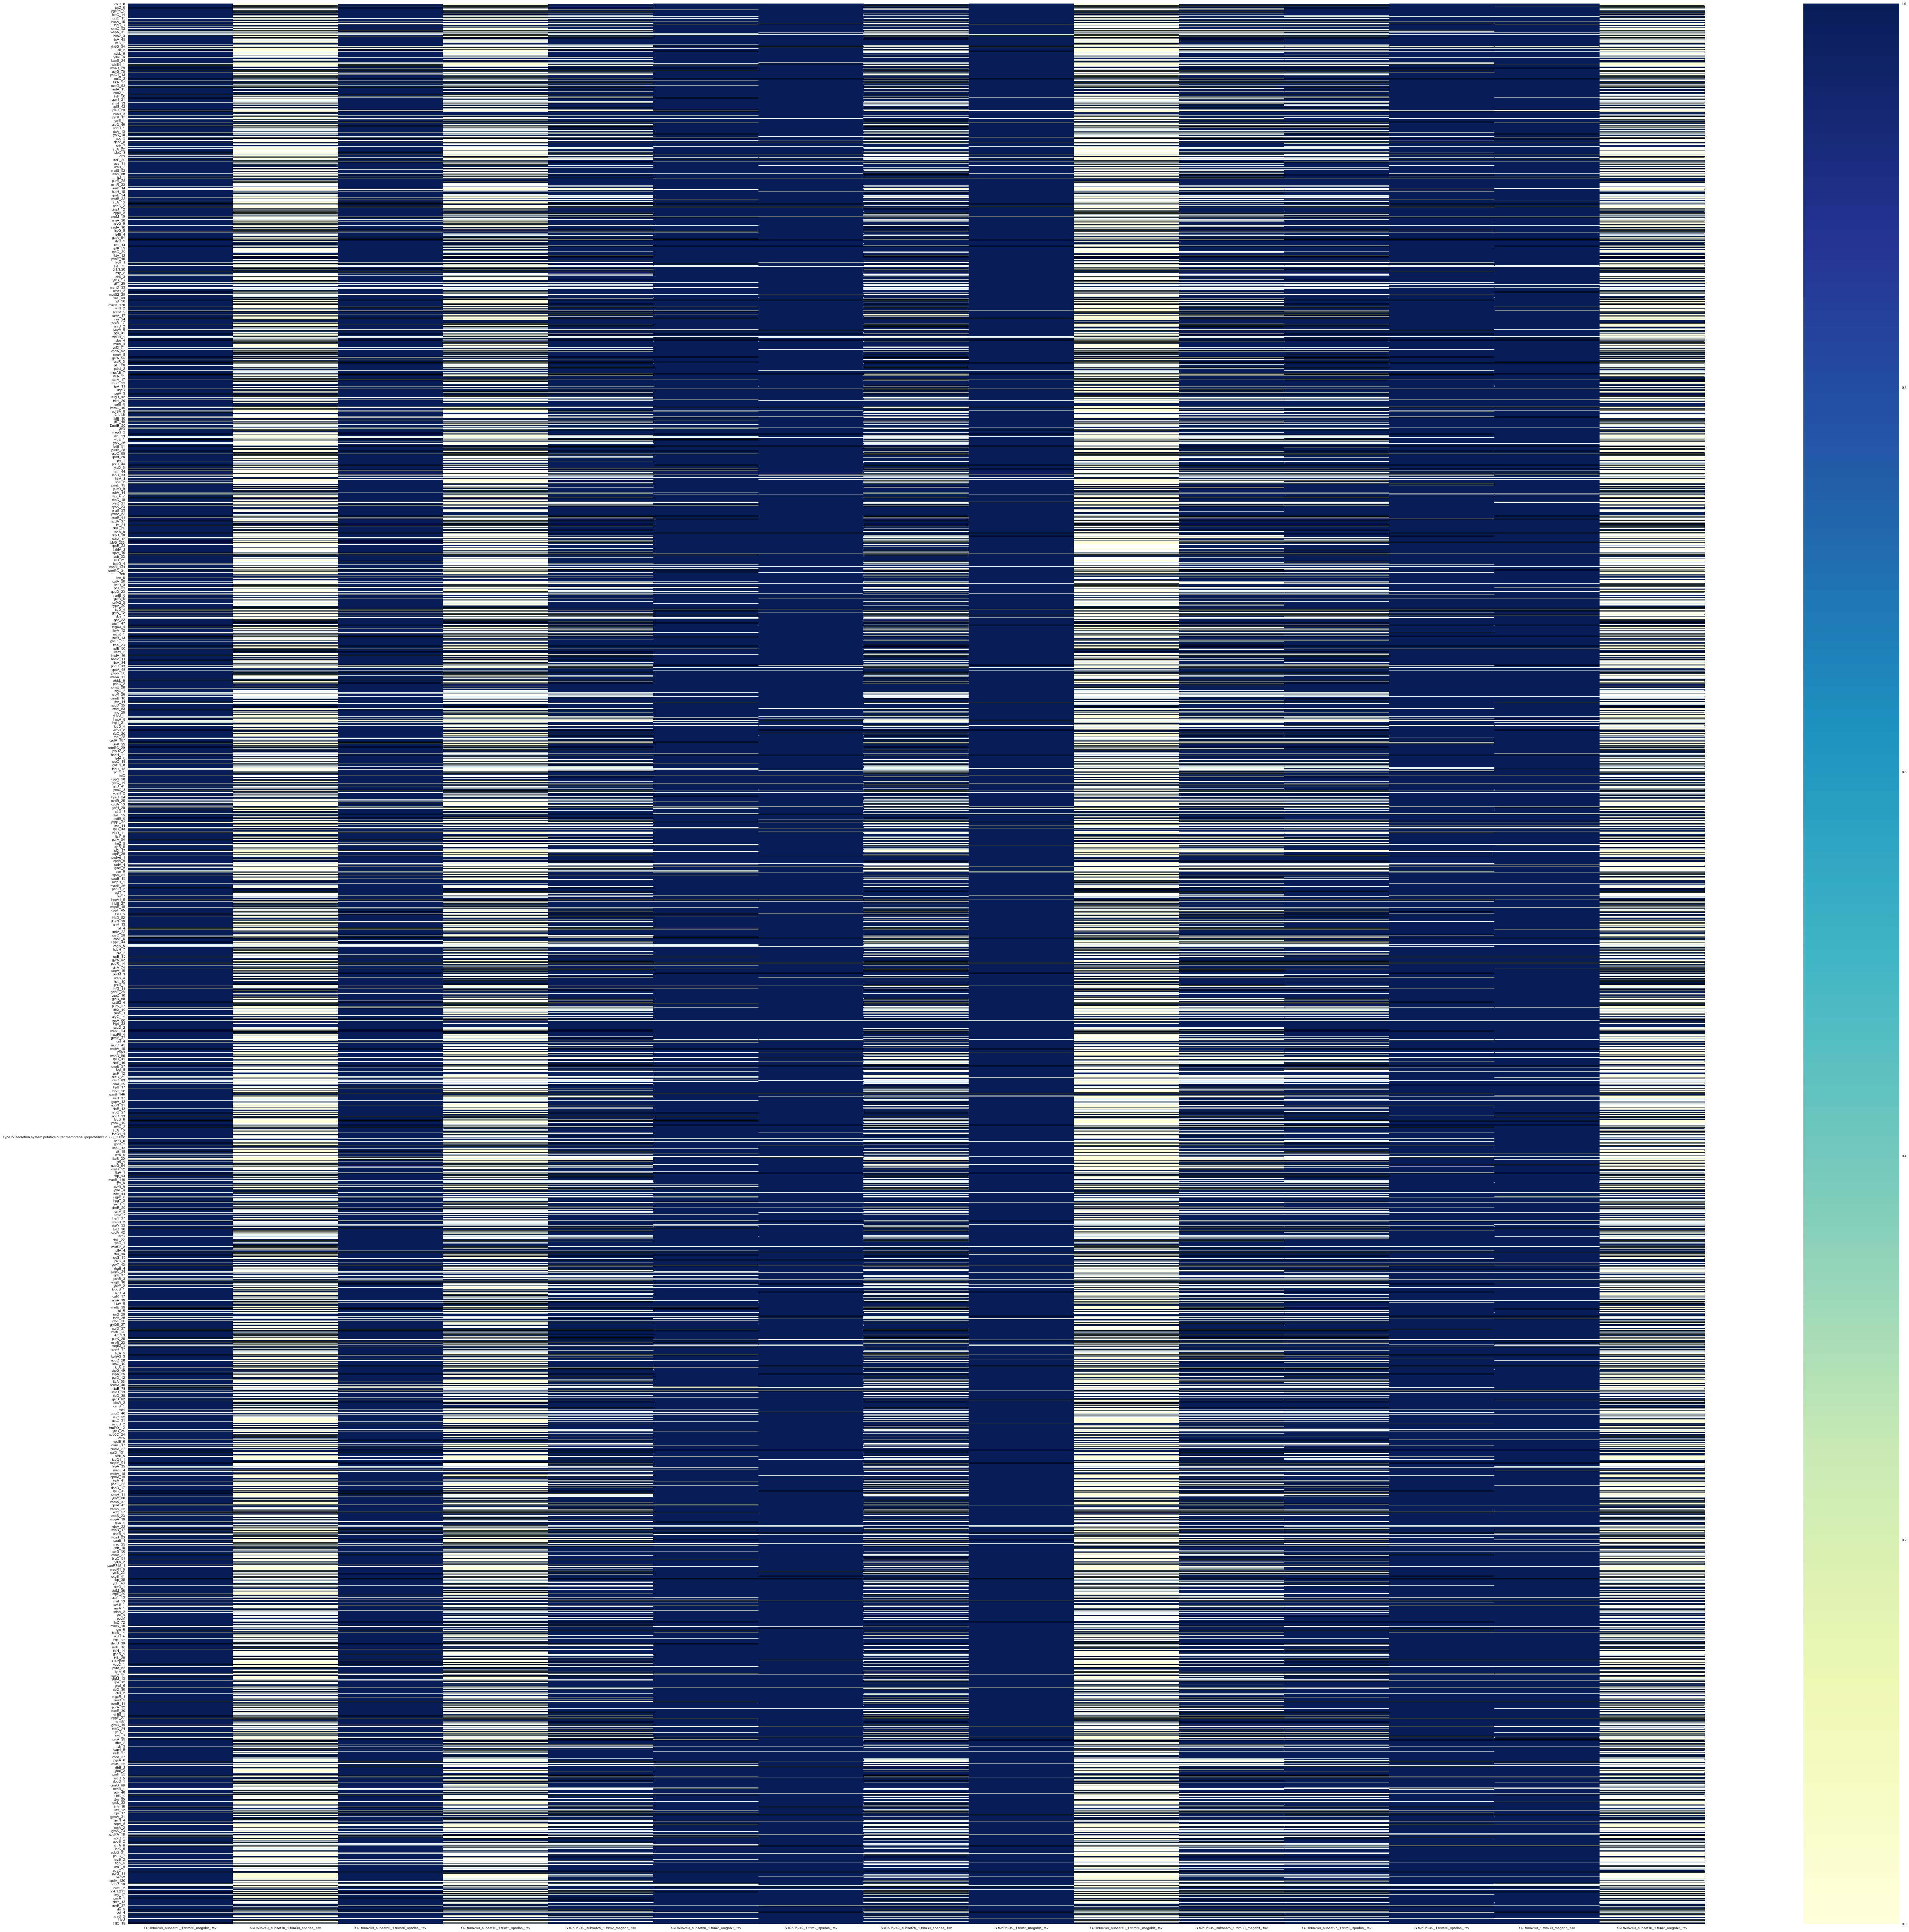

In [37]:
sns.set(style="white")
# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(100,100))
sns.heatmap(dense_df, linewidths=.00000001, ax=ax, cmap="YlGnBu", linecolor="10")
#sns.heatmap(dense_df, cmap="YlGnBu", linewidths=.000001)

In [18]:
pd.DataFrame.from_dict?

In [19]:
# Import glob and create a dictionary of dataframes with name 'metaG*csv' with ',' delimiter. Split the file names by 
# '_' to generate unique file names for output. 
import glob 

genus_dict={}
for file in glob.glob('*tsv'):
    df=pd.read_table(file, delimiter = "\t")
    #a = df.drop(df.columns[[0, 1]], axis=1)
    #x=file.split('tsv')[0]
    #print(x)
    #genus_dict[x]=df
df

,locus_tag,ftype,gene,EC_number,product
0,DIGCPLMF_00001,CDS,hypothetical protein,NaN,NaN
1,DIGCPLMF_00002,CDS,araQ_1,L-arabinose transport system permease protein ...,NaN
2,DIGCPLMF_00003,CDS,hypothetical protein,NaN,NaN
3,DIGCPLMF_00004,CDS,hypothetical protein,NaN,NaN
4,DIGCPLMF_00005,CDS,lplJ_1,6.3.1.20,Lipoate-protein ligase LplJ
5,DIGCPLMF_00006,CDS,hypothetical protein,NaN,NaN
6,DIGCPLMF_00007,CDS,hypothetical protein,NaN,NaN
7,DIGCPLMF_00008,CDS,rpoC_1,2.7.7.6,DNA-directed RNA polymerase subunit beta'
8,DIGCPLMF_00009,CDS,spoIIM,Stage II sporulation protein M,NaN
9,DIGCPLMF_00010,CDS,hypothetical protein,NaN,NaN


In [20]:
import pyupset as pyu

In [21]:
# Generate upset plot of the intersection of between data contained in column labeled 'gene'. 
pplot=pyu.plot(genus_dict, unique_keys = ['gene'], inters_size_bounds=(700, 100000))
pplot.set_size_inches(18.5, 10.5)
#pplot['figure'].savefig('meta_annotation_comparison.png').savefig('kaiju-smash-podar.pdf', dpi=100000000)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

Import image in image manipulation software like pixlr to clean up colors